In [2]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [4]:
df=pd.read_csv('df_for_analysis.csv')

In [5]:
df.head()

,listing_id,index,zipcode,latitude,longitude,sub_borough,borough,host_is_superhost,host_listings_count,host_has_profile_pic,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,host_year_num
0,2515,0,10026,40.799205,-73.953676,Central Harlem,Manhattan,0.0,3.0,1.0,...,9.0,9.0,10.0,9.0,9.0,9.0,0,0,0,10
1,2539,1,11218,40.647486,-73.972370,Borough Park,Brooklyn,1.0,8.0,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,10
2,3330,3,11211,40.708558,-73.942362,Greenpoint,Brooklyn,0.0,5.0,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,10
3,3647,4,10037,40.809018,-73.941902,Central Harlem,Manhattan,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,10
4,3831,5,11238,40.685138,-73.959757,Central Brooklyn,Brooklyn,0.0,1.0,1.0,...,9.0,9.0,10.0,10.0,9.0,9.0,0,0,0,10


In [6]:
df.columns

Index(['listing_id', 'index', 'zipcode', 'latitude', 'longitude',
       'sub_borough', 'borough', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'price', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'host_year_num'],
      dtype='object')

### Number of Listings

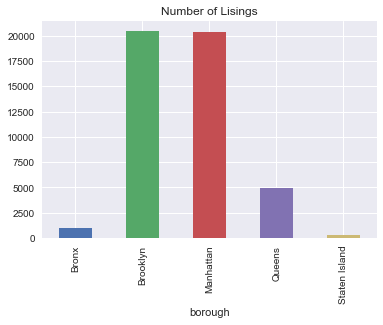

In [7]:
number_of_listing_borough = df.groupby('borough')
number_of_listing_borough.size().plot(kind='bar',title="Number of Lisings",figsize=(6,4))

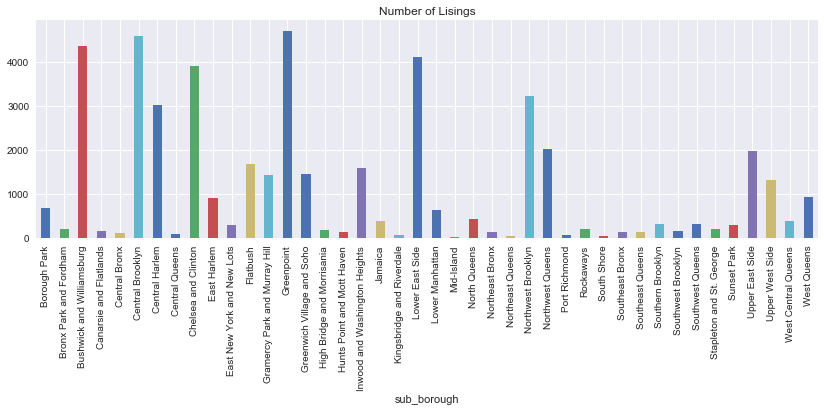

In [9]:
number_of_listing = df.groupby('sub_borough')
number_of_listing.size().plot(kind='bar',title="Number of Lisings",figsize=(14,4))

### Average Price per Person (Price + Cleanning fee)

In [10]:
df['price_per_person']=df['price']+df['cleaning_fee']

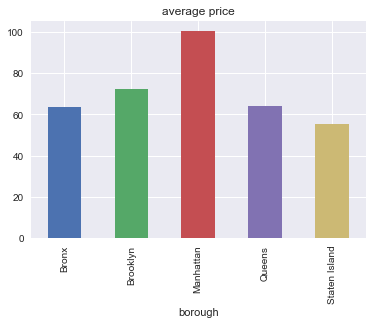

In [11]:
average_price_bor=df.groupby('borough').price_per_person.mean().plot(kind='bar',title="average price",figsize=(6,4))

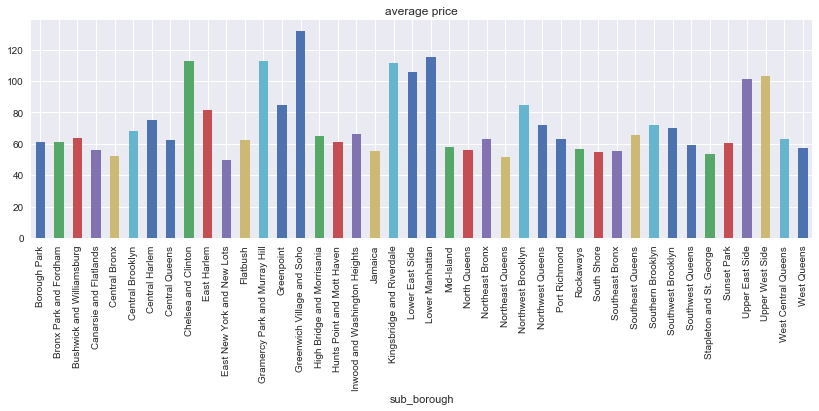

In [12]:
average_price_sub=df.groupby('sub_borough').price_per_person.mean().plot(kind='bar',title="average price",figsize=(14,4))

## Reviews Statistics

In [13]:
df['review_scores_overall']=df['review_scores_rating']/10

In [14]:
review_score=df[['borough','sub_borough',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]

In [15]:
review_score.groupby('borough').mean()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
borough,,,,,,
Bronx,9.533243,9.323848,9.699728,9.717391,9.050204,9.402174
Brooklyn,9.638904,9.278414,9.770300,9.773158,9.397370,9.445285
Manhattan,9.555034,9.202214,9.697574,9.733828,9.623394,9.310311
Queens,9.572052,9.326143,9.738114,9.723721,9.366838,9.408074
Staten Island,9.641509,9.479245,9.818868,9.815789,9.296992,9.522556


### Number of Reviews

#### Borough

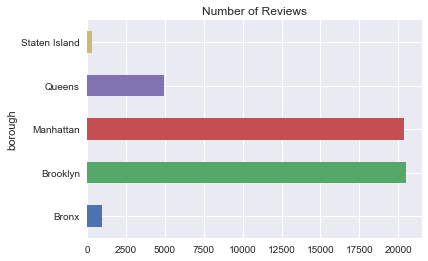

In [16]:
review_bor_size=review_score.groupby('borough').size()
review_bor_size.plot(kind='barh',title="Number of Reviews",figsize=(6,4))

#### Subborough

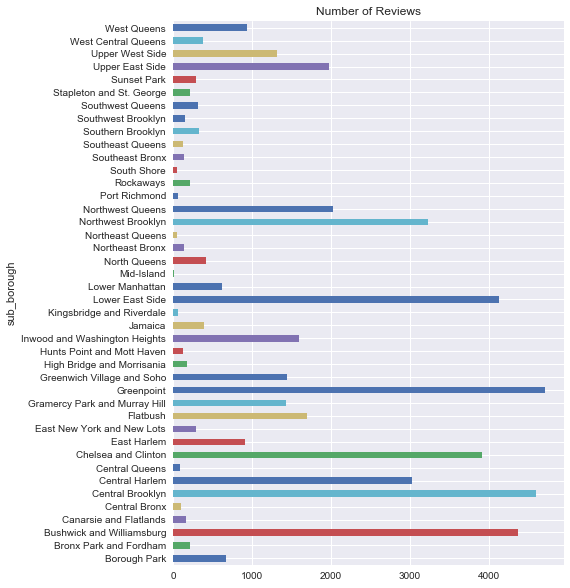

In [17]:
review_sub_size=review_score.groupby('sub_borough').size()
review_sub_size.plot(kind='barh',title="Number of Reviews",figsize=(7,10))

### Review Score

#### Average Overall Review Score

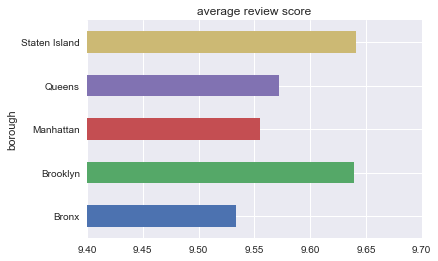

In [18]:
average_review_borough = df.groupby('borough')
average_review_borough.review_scores_accuracy.mean().plot(kind='barh',
                                                          title="average review score",xlim=((9.4,9.7)),figsize=(6,4))

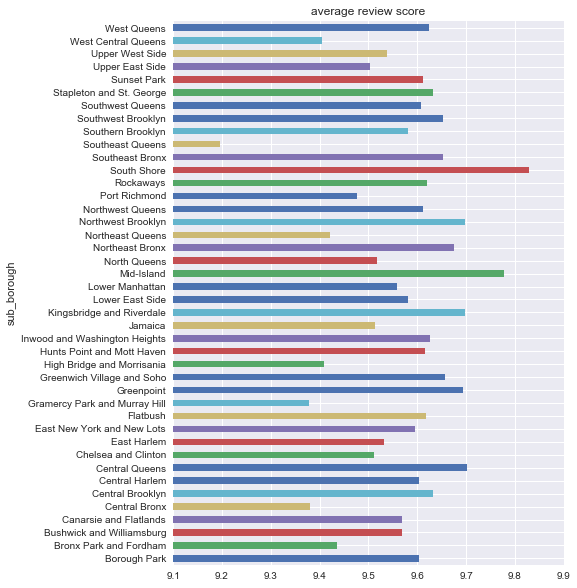

In [20]:
average_review_borough = df.groupby('sub_borough')
average_review_borough.review_scores_accuracy.mean().plot(kind='barh',
                                                          title="average review score",xlim=((9.1,9.9)),figsize=(7,10))

#### Accuracy, Cleanliness, Checkin, Communication, Location, Value 

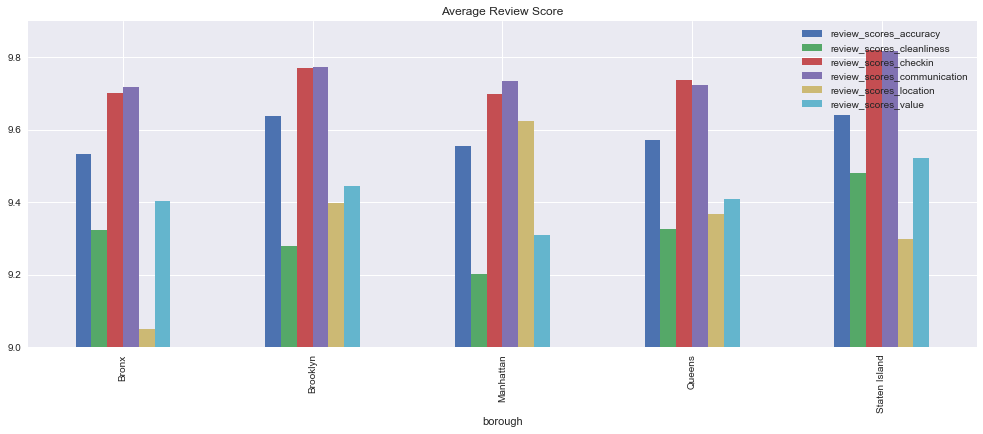

In [21]:
review_score.groupby('borough').mean().plot(kind='bar',title="Average Review Score",ylim=((9,9.9)),figsize=(17,6))

In [22]:
review_score.groupby('borough').mean()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
borough,,,,,,
Bronx,9.533243,9.323848,9.699728,9.717391,9.050204,9.402174
Brooklyn,9.638904,9.278414,9.770300,9.773158,9.397370,9.445285
Manhattan,9.555034,9.202214,9.697574,9.733828,9.623394,9.310311
Queens,9.572052,9.326143,9.738114,9.723721,9.366838,9.408074
Staten Island,9.641509,9.479245,9.818868,9.815789,9.296992,9.522556


In [23]:
from math import pi
# Set data
score = pd.DataFrame({
'group': ['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
'accuracy': list(review_score.groupby('borough').mean()['review_scores_accuracy']),
'cleanliness': list(review_score.groupby('borough').mean()['review_scores_cleanliness']),
'checkin': list(review_score.groupby('borough').mean()['review_scores_checkin']),
'communication': list(review_score.groupby('borough').mean()['review_scores_communication']),
'location': list(review_score.groupby('borough').mean()['review_scores_location']),
'value': list(review_score.groupby('borough').mean()['review_scores_value']),
})

In [29]:
def make_spider(row, title, color):
 
    # number of variable
    categories=list(score)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,2,row+2, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([9.3,9.6,10], ["9.3","9.6","10"], color="grey", size=8)
    plt.ylim(9,10)

    # Ind1
    values=score.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=3, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)

    # ------- PART 2: Apply to all individuals
    # initialize the figure
    my_dpi=100
    plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

    # Create a color palette:
    my_palette = plt.cm.get_cmap("Set2", len(score.index))


In [27]:
for row in range(0, len(score.index)):
    make_spider(row=row, title=score['group'][row], color=my_palette(row))

NameError: name 'my_palette' is not defined

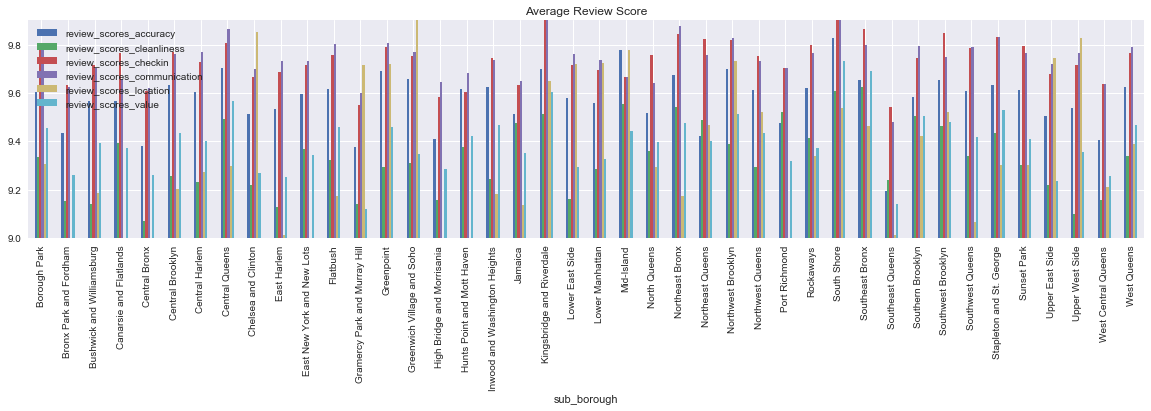

In [30]:
review_score.groupby('sub_borough').mean().plot(kind='bar',title="Average Review Score",ylim=((9,9.9)),figsize=(20,4))

## Popularity

In [31]:
popularity=df[[ 'sub_borough', 'borough','availability_30',
       'availability_60']]
popularity.groupby('borough').mean()

,availability_30,availability_60
borough,,
Bronx,9.773486,26.458246
Brooklyn,4.387305,13.420020
Manhattan,4.073027,12.900717
Queens,9.264456,24.623130
Staten Island,11.204142,29.594675


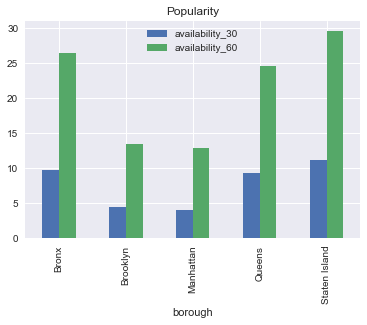

In [32]:
popularity.groupby('borough').mean().plot(kind='bar',title='Popularity', figsize=(6,4))

## Room Type Statistics

In [146]:
df.loc[df['room_type'] == 1, 'room_type'] = 'Private Room'
df.loc[df['room_type'] == 2, 'room_type'] = 'Entire home/apt'
df.loc[df['room_type'] == 3, 'room_type'] = 'Shared room'
room=df[['sub_borough', 'borough','room_type']]

### Number of Different Room Types

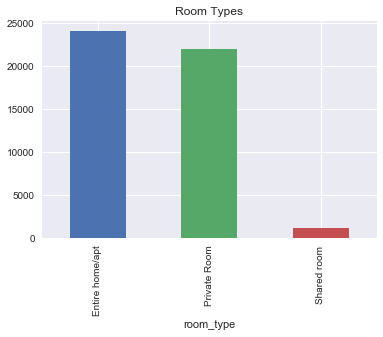

In [149]:
room.groupby('room_type').size().plot(kind='bar',title='Room Types',figsize=(6,4))

### Room Types in each Borough

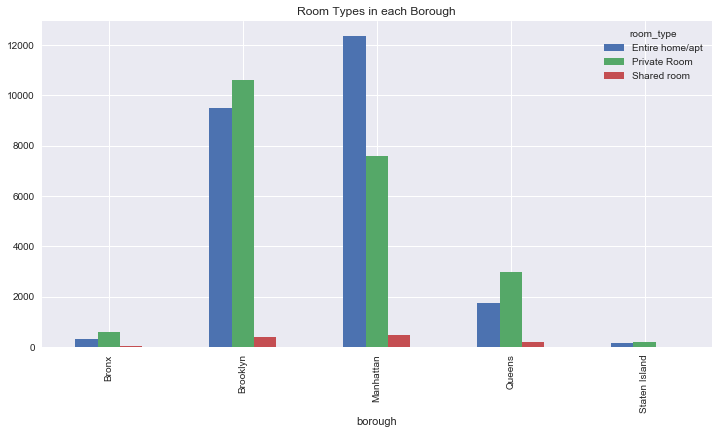

In [150]:
room_borough = df.groupby(['borough','room_type'])
room_borough.size().unstack().plot(kind='bar',title='Room Types in each Borough',figsize=(12,6))